<a href="https://colab.research.google.com/github/SRCrimson/Practice/blob/main/FA_PROBABILIDAD_DE_INCUMPLIMIENTO_PAGO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cargar las librerias

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np


**Cargar la base de datos**

In [4]:
from google.colab import files

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
datos=pd.read_csv("//content/credit_risk_dataset.csv",delimiter=',')
datos

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [ ]:
datos.describe().round(1)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.0,32581.0,31686.0,32581.0,29465.0,32581.0,32581.0,32581.0
mean,27.7,66074.8,4.8,9589.4,11.0,0.2,0.2,5.8
std,6.3,61983.1,4.1,6322.1,3.2,0.4,0.1,4.1
min,20.0,4000.0,0.0,500.0,5.4,0.0,0.0,2.0
25%,23.0,38500.0,2.0,5000.0,7.9,0.0,0.1,3.0
50%,26.0,55000.0,4.0,8000.0,11.0,0.0,0.2,4.0
75%,30.0,79200.0,7.0,12200.0,13.5,0.0,0.2,8.0
max,144.0,6000000.0,123.0,35000.0,23.2,1.0,0.8,30.0


**Tipos de datos**

Tipos de datos para cada variable: con valores enteros, valores decimales y categoricos

In [ ]:
datos.dtypes
print('\nlos datos son de tipo:\n',datos.dtypes)


los datos son de tipo:
 person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object


Primeras 5 filas

In [ ]:
datos.head(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


**Datos faltante**

Determinar que variables tienen datos faltantes. Tiene valores faltantes la columna person_emp_lenght y loan_int_rate

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


# **Detección de valores atípicos box plot**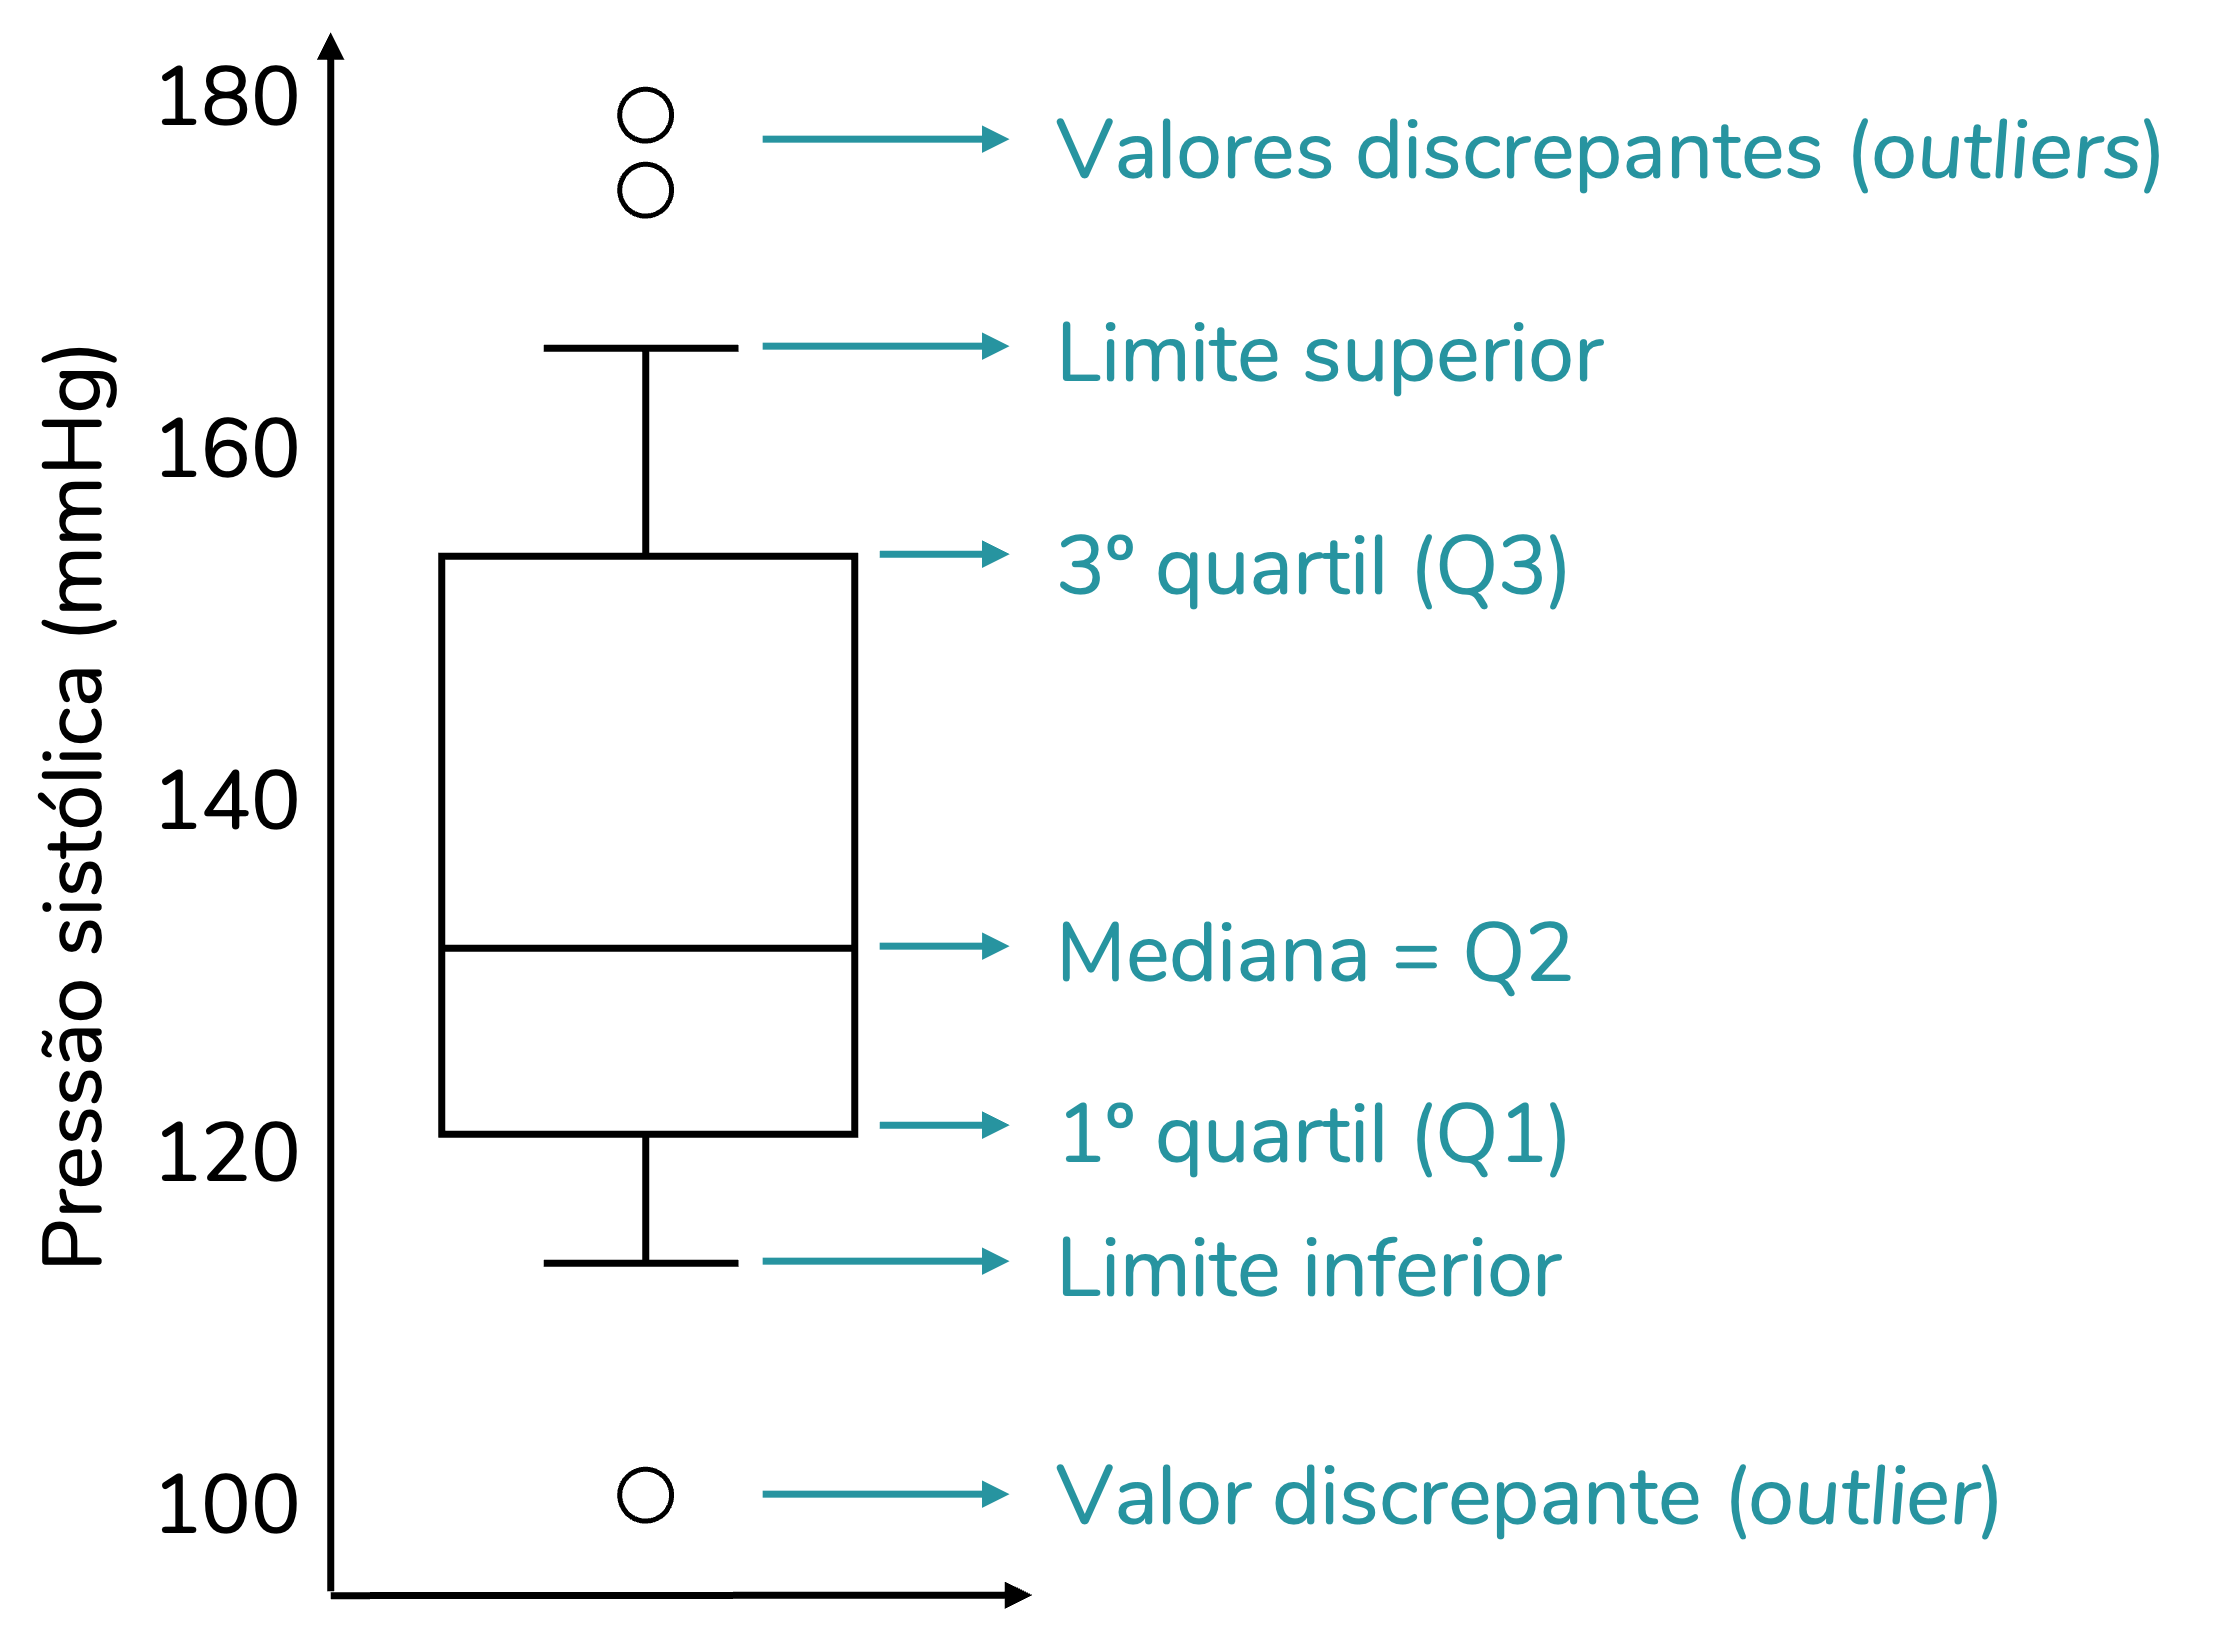

<Axes: >

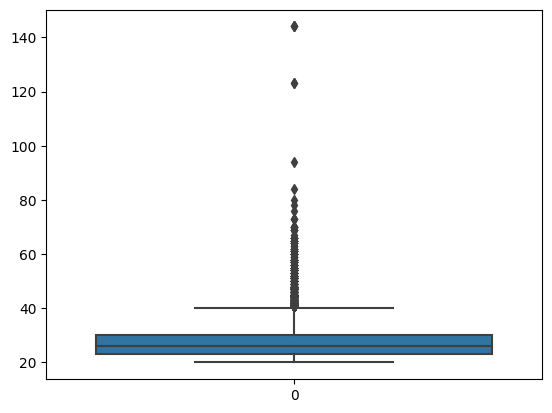

In [ ]:
sns.boxplot(datos['person_age'])

In [ ]:
Q1 = datos['person_age'].quantile(0.25)
Q3 = datos['person_age'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = datos[(datos['person_age'] < limite_inferior) | (datos['person_age'] > limite_superior)]
outliers.count()

person_age                    1494
person_income                 1494
person_home_ownership         1494
person_emp_length             1460
loan_intent                   1494
loan_grade                    1494
loan_amnt                     1494
loan_int_rate                 1331
loan_status                   1494
loan_percent_income           1494
cb_person_default_on_file     1494
cb_person_cred_hist_length    1494
dtype: int64

El borde superior del cuadro azul representa el 75% de la distribucion de la población y el borde inferior representa el 25% de la distribucion de la población. Entonces la mayoria de los datos estan por encima de 20 y antes de 40. Ademas se encuentran outliers por encima de 40 hasta 144 años, los cuales son aproximadamente 1494 datos atipicos.

Lo anterior no tiene mucha logica,porque en los bancos de Colombia las personas de avanzada edad, por naturaleza o por simple lógica, son consideradas de alto riesgo, además no se conoce una persona de mas de 120 años en el mundo. Pero igual no se eliminaran dichos datos, sino que se reemplazaran los datos con edades mayores a 100 años por la media de las edades.  Referencia: https://www.rankia.co/blog/mejores-creditos-hipotecarios-vivienda/4245450-cual-edad-maxima-para-solicitar-credito-hipotecario

In [ ]:
# Calculamos la media de person_age sin tener en cuenta las edades mayores a 100
media_person_age =datos[datos['person_age'] <= 100]['person_age'].mean()

datos.loc[datos['person_age'] > 100, 'person_age'] = media_person_age
print(datos)

       person_age  person_income person_home_ownership  person_emp_length  \
0            22.0          59000                  RENT              123.0   
1            21.0           9600                   OWN                5.0   
2            25.0           9600              MORTGAGE                1.0   
3            23.0          65500                  RENT                4.0   
4            24.0          54400                  RENT                8.0   
...           ...            ...                   ...                ...   
32576        57.0          53000              MORTGAGE                1.0   
32577        54.0         120000              MORTGAGE                4.0   
32578        65.0          76000                  RENT                3.0   
32579        56.0         150000              MORTGAGE                5.0   
32580        66.0          42000                  RENT                2.0   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \

In [ ]:
datos.describe().round(1)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.0,32581.0,31686.0,32581.0,29465.0,32581.0,32581.0,32581.0
mean,27.7,66074.8,4.8,9589.4,11.0,0.2,0.2,5.8
std,6.2,61983.1,4.1,6322.1,3.2,0.4,0.1,4.1
min,20.0,4000.0,0.0,500.0,5.4,0.0,0.0,2.0
25%,23.0,38500.0,2.0,5000.0,7.9,0.0,0.1,3.0
50%,26.0,55000.0,4.0,8000.0,11.0,0.0,0.2,4.0
75%,30.0,79200.0,7.0,12200.0,13.5,0.0,0.2,8.0
max,94.0,6000000.0,123.0,35000.0,23.2,1.0,0.8,30.0


<Axes: >

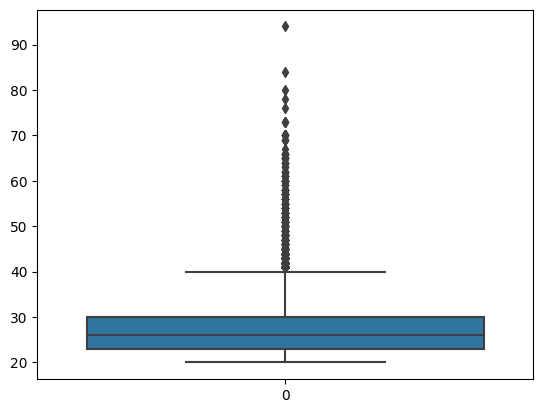

In [ ]:
sns.boxplot(datos['person_age'])

**Valores nulos**

Se eliminan los registros nulos, mencionados

In [ ]:
datos=pd.DataFrame(datos)
datos.isnull()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,False,False,False,False,False,False,False,False,False,False,False,False
32577,False,False,False,False,False,False,False,False,False,False,False,False
32578,False,False,False,False,False,False,False,False,False,False,False,False
32579,False,False,False,False,False,False,False,False,False,False,False,False


isnull(). Un método que devuelve un DataFrame con las mismas dimensiones que el original, pero con valores booleanos indicando si los registros originales son o no nulos. Acontinuacion se suman la cantidad de valores nulos que tienen las dos variables: person_emp_length, loan_int_rate.


In [ ]:
datos.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [ ]:
datos=datos.dropna()

Con la funcion dropna() se eliminan las filas que tengan valores nulos y verificamos la cantidad de nulos que hay en cada variable

In [ ]:
datos.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

**Valores duplicados**

In [ ]:
datos.duplicated().sum()

137

Se tienen 137 datos duplicados, y se proceden a eliminar y verificar que se eliminaron correctamente.

In [ ]:
datos=datos.drop_duplicates()
datos.duplicated().sum()

0

**Convertir variables categoricas en numericas** Preferimos usar label encoder que one hot encoder porque es mas practica y sencilla.

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
datos['person_home_ownership_numerica'] = labelencoder.fit_transform(datos['person_home_ownership'])
datos

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_numerica
0,22.0,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,3
1,21.0,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,2
2,25.0,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,0
3,23.0,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,3
4,24.0,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57.0,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30,0
32577,54.0,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19,0
32578,65.0,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28,3
32579,56.0,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26,0


In [ ]:
datos['loan_intent_numerica'] = labelencoder.fit_transform(datos['loan_intent'])
datos

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_numerica,loan_intent_numerica
0,22.0,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,3,4
1,21.0,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,2,1
2,25.0,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,0,3
3,23.0,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,3,3
4,24.0,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57.0,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30,0,4
32577,54.0,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19,0,4
32578,65.0,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28,3,2
32579,56.0,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26,0,4


In [ ]:
datos['loan_grade_numerica'] = labelencoder.fit_transform(datos['loan_grade'])
datos

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_numerica,loan_intent_numerica,loan_grade_numerica
0,22.0,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,3,4,3
1,21.0,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,2,1,1
2,25.0,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,0,3,2
3,23.0,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,3,3,2
4,24.0,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57.0,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30,0,4,2
32577,54.0,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19,0,4,0
32578,65.0,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28,3,2,1
32579,56.0,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26,0,4,1


In [ ]:
datos['cb_person_default_on_file_numerica'] = labelencoder.fit_transform(datos['cb_person_default_on_file'])
datos

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_numerica,loan_intent_numerica,loan_grade_numerica,cb_person_default_on_file_numerica
0,22.0,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,3,4,3,1
1,21.0,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,2,1,1,0
2,25.0,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,0,3,2,0
3,23.0,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,3,3,2,0
4,24.0,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,3,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57.0,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30,0,4,2,0
32577,54.0,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19,0,4,0,0
32578,65.0,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28,3,2,1,0
32579,56.0,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26,0,4,1,0


Según lo anterior, las variables categorias quedaron de la siguiente forma numerica.
**person_home_ownership:**
-RENT:3
-OWN:2
-MORTAGE:0
-OTHER:1
**loan_intent:**
-VENTURE:5
-PERSONAL:4
-EDUCATION:1
-MEDICAL:3
-HOMEIMPROVEMENT:2
-DEBTCONSOLIDATION:0
**loan_grade:**
-A:0
-B:1
-C:2
-D:3
-E:4
-F:5
-G:6
**cb_person_default_on_file:**
-Y:1
-N:0

In [ ]:
valores_loangradenumerica = datos['loan_grade_numerica'].unique()

# Imprimir los valores únicos
print(valores_loangradenumerica)

[3 1 2 0 4 5 6]


In [ ]:
valores_loan_intent_numerica = datos['loan_intent_numerica'].unique()

# Imprimir los valores únicos
print(valores_loan_intent_numerica)

[4 1 3 5 2 0]


In [ ]:
valores_person_home_ownership_numerica= datos['person_home_ownership_numerica'].unique()

# Imprimir los valores únicos
print(valores_person_home_ownership_numerica)

[3 2 0 1]


Se eliminan las columnas categoricas

In [ ]:
datos= datos.drop(['person_home_ownership', 'loan_intent', 'loan_grade','cb_person_default_on_file'], axis=1)
datos

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_numerica,loan_intent_numerica,loan_grade_numerica,cb_person_default_on_file_numerica
0,22.0,59000,123.0,35000,16.02,1,0.59,3,3,4,3,1
1,21.0,9600,5.0,1000,11.14,0,0.10,2,2,1,1,0
2,25.0,9600,1.0,5500,12.87,1,0.57,3,0,3,2,0
3,23.0,65500,4.0,35000,15.23,1,0.53,2,3,3,2,0
4,24.0,54400,8.0,35000,14.27,1,0.55,4,3,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57.0,53000,1.0,5800,13.16,0,0.11,30,0,4,2,0
32577,54.0,120000,4.0,17625,7.49,0,0.15,19,0,4,0,0
32578,65.0,76000,3.0,35000,10.99,1,0.46,28,3,2,1,0
32579,56.0,150000,5.0,15000,11.48,0,0.10,26,0,4,1,0


Ahora se ven las caracteristicas estadisticas del dataFrame, para obtener una comprensión rápida de la distribución y las propiedades básicas de los datos.

In [ ]:
datos.describe().round(1)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_numerica,loan_intent_numerica,loan_grade_numerica,cb_person_default_on_file_numerica
count,28501.0,28501.0,28501.0,28501.0,28501.0,28501.0,28501.0,28501.0,28501.0,28501.0,28501.0,28501.0
mean,27.7,66654.4,4.8,9658.5,11.0,0.2,0.2,5.8,1.7,2.5,1.2,0.2
std,6.2,62376.0,4.2,6329.6,3.2,0.4,0.1,4.0,1.4,1.7,1.2,0.4
min,20.0,4000.0,0.0,500.0,5.4,0.0,0.0,2.0,0.0,0.0,0.0,0.0
25%,23.0,39500.0,2.0,5000.0,7.9,0.0,0.1,3.0,0.0,1.0,0.0,0.0
50%,26.0,56000.0,4.0,8000.0,11.0,0.0,0.2,4.0,3.0,3.0,1.0,0.0
75%,30.0,80000.0,7.0,12500.0,13.5,0.0,0.2,8.0,3.0,4.0,2.0,0.0
max,84.0,6000000.0,123.0,35000.0,23.2,1.0,0.8,30.0,3.0,5.0,6.0,1.0


In [ ]:
datos.to_csv('nueva_base_de_datos.csv', index=False)

**Histograma de los datos**

<ipython-input-30-101c673f1c81>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  datos.hist(ax=ax)


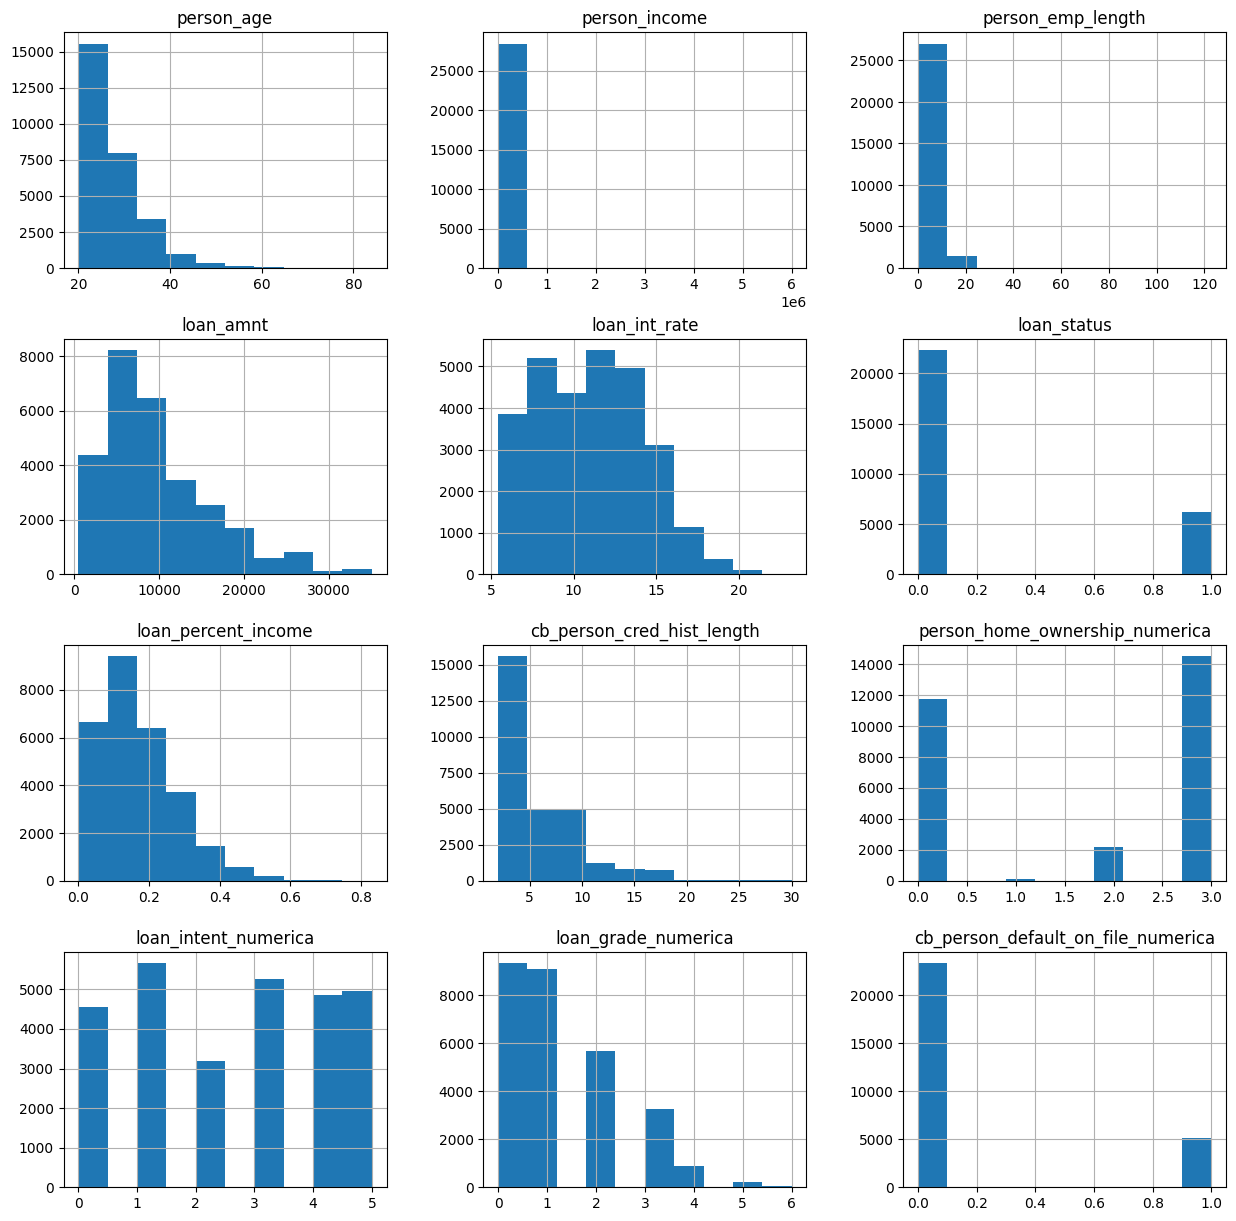

In [ ]:
figura=plt.figure(figsize=(15,15))
ax=figura.gca()
datos.hist(ax=ax)
plt.show()

In [ ]:
datos.groupby('person_income').size().sort_values()

person_income
4000       1
66150      1
66200      1
66215      1
66250      1
        ... 
45000    531
40000    582
50000    672
30000    726
60000    919
Length: 3835, dtype: int64

In [ ]:
conteo_person_income = datos['person_income'].value_counts()
print(conteo_person_income)

60000     919
30000     726
50000     672
40000     582
45000     531
         ... 
55992       1
98518       1
98700       1
98800       1
720000      1
Name: person_income, Length: 3835, dtype: int64


In [ ]:
conteo_loan_intent_numerica = datos['loan_intent_numerica'].value_counts()
print(conteo_loan_intent_numerica)

1    5670
3    5269
5    4969
4    4859
0    4547
2    3187
Name: loan_intent_numerica, dtype: int64


In [ ]:
conteo_person_emp_length = datos['person_emp_length'].value_counts()
print(conteo_person_emp_length)

0.0      3690
2.0      3453
3.0      3121
5.0      2696
1.0      2629
4.0      2561
6.0      2382
7.0      1963
8.0      1525
9.0      1221
11.0      660
10.0      628
12.0      515
13.0      380
14.0      305
15.0      213
16.0      152
17.0      114
18.0       96
19.0       61
20.0       36
21.0       33
22.0       18
23.0       10
24.0        8
25.0        8
27.0        5
26.0        4
31.0        4
28.0        2
123.0       2
30.0        2
41.0        1
34.0        1
29.0        1
38.0        1
Name: person_emp_length, dtype: int64


La mayoria de datos tienen una intencion de prestamo por educacion, medicos, Empresa, Personal, Educación, Médico,consolidación de deuda y no tanto por Mejora para el hogar

El tipo de vivienda que domina en los datos son usurios que viven en hipoteca o en alquiler

In [ ]:
conteo_cb_person_cred_hist_length = datos['cb_person_cred_hist_length'].value_counts()
print(conteo_cb_person_cred_hist_length)

3     5201
2     5192
4     5189
7     1670
8     1659
9     1659
5     1656
6     1635
10    1632
14     436
12     424
11     410
13     387
16     385
15     370
17     346
20      29
24      27
28      22
22      21
23      19
30      19
19      18
27      18
21      18
25      17
26      16
18      15
29      11
Name: cb_person_cred_hist_length, dtype: int64


La mayoria tiene un historial crediticio entre 3 y 4 años.

In [ ]:
conteo_loan_amnt = datos['loan_amnt'].value_counts()
print(conteo_loan_amnt)

10000    2321
5000     1770
6000     1591
12000    1581
15000    1337
         ... 
21450       1
21700       1
12125       1
15125       1
19275       1
Name: loan_amnt, Length: 728, dtype: int64


De los graficos anteriores se puede entender la mayoria de datos que representa cada variable y su comportamiento, el cual se realizo detalladamente en el reporte tecnico.

Ahora vemos que  la variable loan_status no esta balanceada. Tiene que 22313 datos son de cumplimiento: el prestatario pagó exitosamente el préstamo según lo acordado y no hubo incumplimiento.
Por otro lado, que 6188 datos han incumplido: el prestatario no pagó el préstamo de acuerdo con los términos acordados y no cumplió con el préstamo.

In [ ]:
datos['loan_status'].value_counts()

0    22313
1     6188
Name: loan_status, dtype: int64

**Correlacion entre las variables**

In [ ]:
matriz_correlacion = datos.corr()
matriz_correlacion

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_numerica,loan_intent_numerica,loan_grade_numerica,cb_person_default_on_file_numerica
person_age,1.000000,0.116724,0.168831,0.055927,0.009506,-0.023306,-0.039265,0.877337,-0.035505,0.036861,0.012252,0.008520
person_income,0.116724,1.000000,0.136427,0.264942,-0.001346,-0.140456,-0.251487,0.116622,-0.201591,0.002469,0.001470,-0.002653
person_emp_length,0.168831,0.136427,1.000000,0.110934,-0.056607,-0.082852,-0.055033,0.146486,-0.232544,0.020593,-0.049578,-0.028179
loan_amnt,0.055927,0.264942,0.110934,1.000000,0.146026,0.114153,0.577708,0.045334,-0.130304,-0.003424,0.150345,0.040714
loan_int_rate,0.009506,-0.001346,-0.056607,0.146026,1.000000,0.339995,0.123441,0.014562,0.136704,-0.002559,0.933528,0.500174
loan_status,-0.023306,-0.140456,-0.082852,0.114153,0.339995,1.000000,0.380000,-0.016559,0.208148,-0.064754,0.380193,0.182397
loan_percent_income,-0.039265,-0.251487,-0.055033,0.577708,0.123441,0.380000,1.000000,-0.029690,0.140541,0.000308,0.125770,0.036503
cb_person_cred_hist_length,0.877337,0.116622,0.146486,0.045334,0.014562,-0.016559,-0.029690,1.000000,-0.025153,0.036259,0.013683,0.007988
person_home_ownership_numerica,-0.035505,-0.201591,-0.232544,-0.130304,0.136704,0.208148,0.140541,-0.025153,1.000000,0.010356,0.116422,0.062408
loan_intent_numerica,0.036861,0.002469,0.020593,-0.003424,-0.002559,-0.064754,0.000308,0.036259,0.010356,1.000000,-0.004449,-0.002493


De la anterior tabla, se logra ver una alta correlacion entre la longitud de la historia creditica de la persona y su edad. Lo cual tiene mucho sentido ya que, las personas cuando alcanzan determinada edad, tienden a iniciar su hostorial crediticio para alcanzar sus propositos y metas.
Tambien hay una alta correlación entre la tasa de interés del préstamo y el grado del préstamo.

No nos podemos quedar con la autocorrelación, por tal motivo, continuamos con otro analisis, con un grafico de dispersion para entender mejor el comportamiento entre cada par de variables.

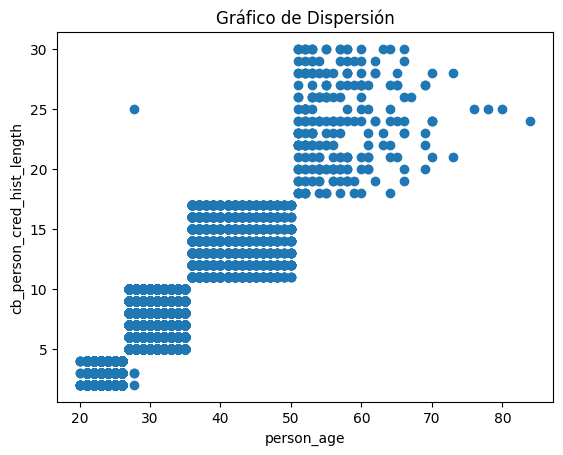

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(datos['person_age'], datos['cb_person_cred_hist_length'])

# Agregar etiquetas a los ejes y un título al gráfico
plt.xlabel('person_age')
plt.ylabel('cb_person_cred_hist_length')
plt.title('Gráfico de Dispersión')

# Mostrar el gráfico
plt.show()
plt.savefig('grafico_de_dispersion1.png')

De este grafico podemos ver un dato que parece ser extraño, porque es imposible que con 27 años una persona tenga un historial crediticio de 25 años. Este dato se puede deber a que en un paso anterior para manejar mejor los datos con edades muy altas, se le asignaron la media, y ese parece ser uno de ellos.

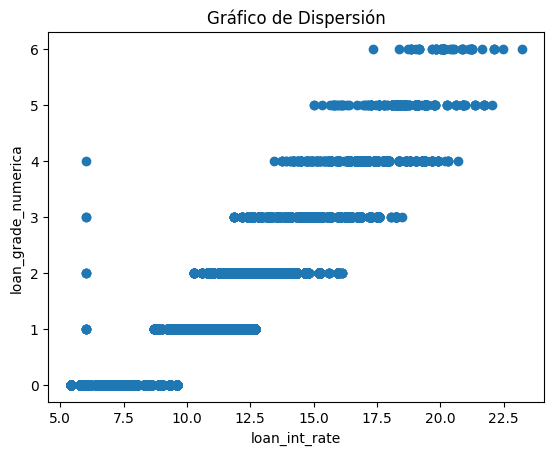

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.scatter(datos['loan_int_rate'], datos['loan_grade_numerica'])

# Agregar etiquetas a los ejes y un título al gráfico
plt.xlabel('loan_int_rate')
plt.ylabel('loan_grade_numerica')
plt.title('Gráfico de Dispersión')

# Mostrar el gráfico
plt.show()
plt.savefig('grafico_de_dispersion2.png')

Visualizar sin escalar

In [ ]:
datos['cb_person_default_on_file_numerica']=datos['cb_person_default_on_file_numerica'].astype(int)

In [ ]:
# Supongamos que 'datos' es tu DataFrame
columna_objetivo = datos.columns[5]  # Obtén el nombre de la columna en la posición 6

# Obtén una lista de todas las columnas excepto la columna objetivo
columnas_sin_objetivo = [col for col in datos.columns if col != columna_objetivo]

# Reorganiza las columnas para que la columna objetivo sea la última
columnas_reorganizadas = columnas_sin_objetivo + [columna_objetivo]

# Crea un nuevo DataFrame con las columnas reorganizadas
datos_reorganizados = datos[columnas_reorganizadas]

# Imprime el DataFrame reorganizado
print(datos_reorganizados)

       person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0            22.0          59000              123.0      35000          16.02   
1            21.0           9600                5.0       1000          11.14   
2            25.0           9600                1.0       5500          12.87   
3            23.0          65500                4.0      35000          15.23   
4            24.0          54400                8.0      35000          14.27   
...           ...            ...                ...        ...            ...   
32576        57.0          53000                1.0       5800          13.16   
32577        54.0         120000                4.0      17625           7.49   
32578        65.0          76000                3.0      35000          10.99   
32579        56.0         150000                5.0      15000          11.48   
32580        66.0          42000                2.0       6475           9.99   

       loan_percent_income 

In [ ]:
datos_escalado=datos_reorganizados.copy()
datos_escalado

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_numerica,loan_intent_numerica,loan_grade_numerica,cb_person_default_on_file_numerica,loan_status
0,22.0,59000,123.0,35000,16.02,0.59,3,3,4,3,1,1
1,21.0,9600,5.0,1000,11.14,0.10,2,2,1,1,0,0
2,25.0,9600,1.0,5500,12.87,0.57,3,0,3,2,0,1
3,23.0,65500,4.0,35000,15.23,0.53,2,3,3,2,0,1
4,24.0,54400,8.0,35000,14.27,0.55,4,3,3,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57.0,53000,1.0,5800,13.16,0.11,30,0,4,2,0,0
32577,54.0,120000,4.0,17625,7.49,0.15,19,0,4,0,0,0
32578,65.0,76000,3.0,35000,10.99,0.46,28,3,2,1,0,1
32579,56.0,150000,5.0,15000,11.48,0.10,26,0,4,1,0,0


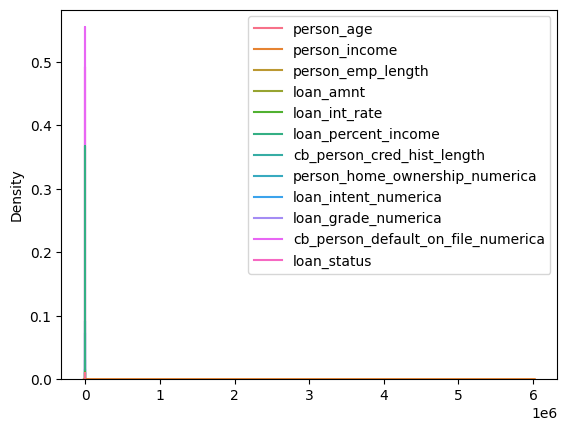

In [ ]:
sns.kdeplot(data=datos_escalado)
plt.show()

In [ ]:
datos_escalado.shape

(28501, 12)

In [ ]:
array=datos_escalado.values
X_clas = array[:,:11]
Y_clas = array[:, 11]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
features=X_clas
scaler=MinMaxScaler(feature_range=(0,1))
rescaledx=scaler.fit_transform(features)
rescaledx

array([[3.12500000e-02, 9.17278185e-03, 1.00000000e+00, ...,
        8.00000000e-01, 5.00000000e-01, 1.00000000e+00],
       [1.56250000e-02, 9.33955971e-04, 4.06504065e-02, ...,
        2.00000000e-01, 1.66666667e-01, 0.00000000e+00],
       [7.81250000e-02, 9.33955971e-04, 8.13008130e-03, ...,
        6.00000000e-01, 3.33333333e-01, 0.00000000e+00],
       ...,
       [7.03125000e-01, 1.20080053e-02, 2.43902439e-02, ...,
        4.00000000e-01, 1.66666667e-01, 0.00000000e+00],
       [5.62500000e-01, 2.43495664e-02, 4.06504065e-02, ...,
        8.00000000e-01, 1.66666667e-01, 0.00000000e+00],
       [7.18750000e-01, 6.33755837e-03, 1.62601626e-02, ...,
        6.00000000e-01, 1.66666667e-01, 0.00000000e+00]])

In [ ]:
rescaledx.shape[1]

11

In [ ]:
columns=list(datos_escalado.columns)
columns

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'person_home_ownership_numerica',
 'loan_intent_numerica',
 'loan_grade_numerica',
 'cb_person_default_on_file_numerica',
 'loan_status']

In [ ]:
datos_escaled=pd.DataFrame(data=rescaledx,columns=['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'person_home_ownership_numerica',
 'loan_intent_numerica',
 'loan_grade_numerica',
 'cb_person_default_on_file_numerica'])
datos_escaled

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_numerica,loan_intent_numerica,loan_grade_numerica,cb_person_default_on_file_numerica
0,0.031250,0.009173,1.000000,1.000000,0.595506,0.710843,0.035714,1.000000,0.8,0.500000,1.0
1,0.015625,0.000934,0.040650,0.014493,0.321348,0.120482,0.000000,0.666667,0.2,0.166667,0.0
2,0.078125,0.000934,0.008130,0.144928,0.418539,0.686747,0.035714,0.000000,0.6,0.333333,0.0
3,0.046875,0.010257,0.032520,1.000000,0.551124,0.638554,0.000000,1.000000,0.6,0.333333,0.0
4,0.062500,0.008406,0.065041,1.000000,0.497191,0.662651,0.071429,1.000000,0.6,0.333333,1.0
...,...,...,...,...,...,...,...,...,...,...,...
28496,0.578125,0.008172,0.008130,0.153623,0.434831,0.132530,1.000000,0.000000,0.8,0.333333,0.0
28497,0.531250,0.019346,0.032520,0.496377,0.116292,0.180723,0.607143,0.000000,0.8,0.000000,0.0
28498,0.703125,0.012008,0.024390,1.000000,0.312921,0.554217,0.928571,1.000000,0.4,0.166667,0.0
28499,0.562500,0.024350,0.040650,0.420290,0.340449,0.120482,0.857143,0.000000,0.8,0.166667,0.0


<function matplotlib.pyplot.show(close=None, block=None)>

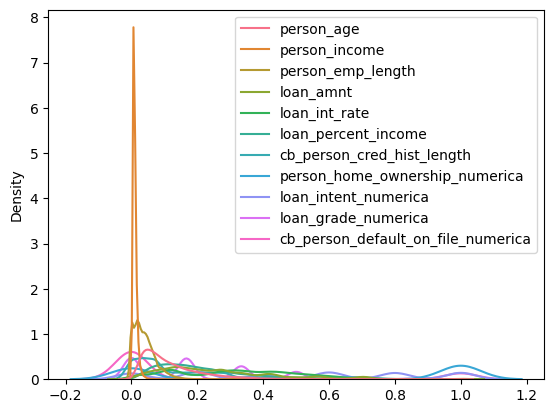

In [ ]:
sns.kdeplot(data=datos_escaled)
plt.show

<ipython-input-53-d0a95340c33b>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  datos_escaled.plot(ax=ax,kind='density',subplots=True,layout=(5,4),sharex=False)


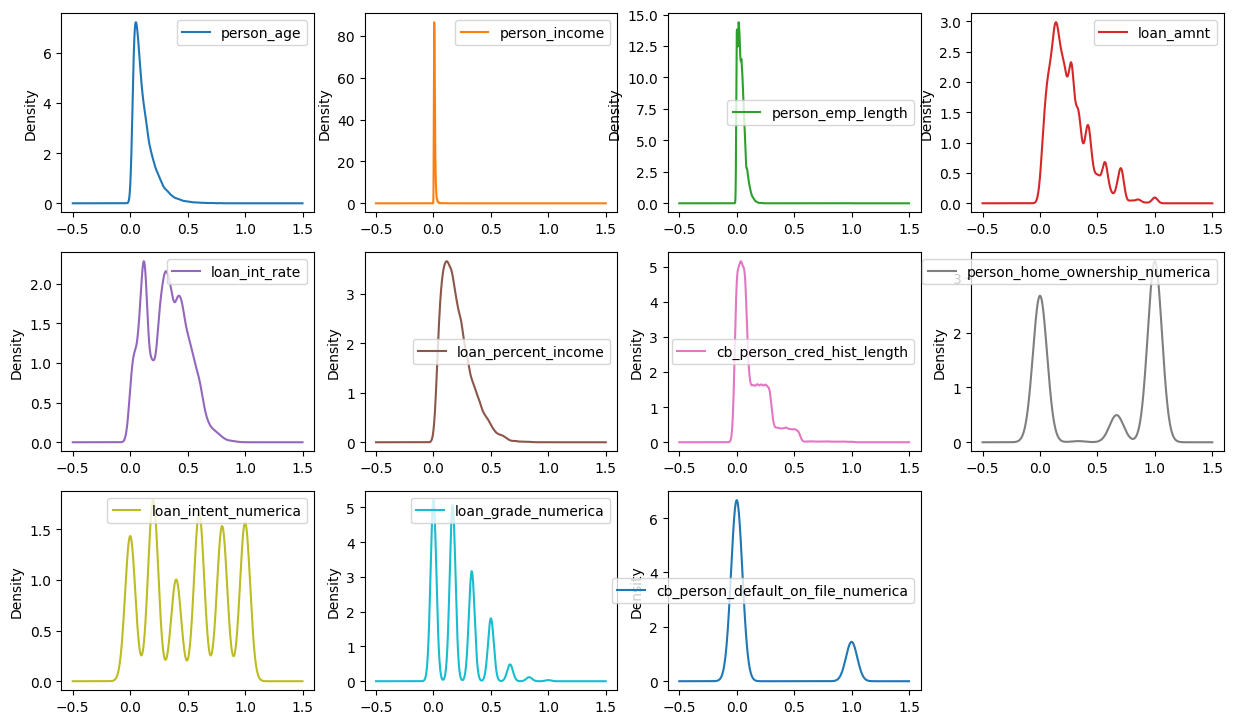

In [ ]:
fig=plt.figure(figsize=(15,15))
ax=fig.gca()
datos_escaled.plot(ax=ax,kind='density',subplots=True,layout=(5,4),sharex=False)
plt.show()

De las graficas anteriores se ve que algunas muestran una distribucion normal, como por ejemplo la variable person_age, person_income, person_emp_length, loan_percent_income y cb_person_cred_hist_length

In [ ]:
datos_target_array=pd.DataFrame(data=Y_clas,columns=['loan_status'])
datos_target_array

,loan_status
0,1.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
28496,0.0
28497,0.0
28498,1.0
28499,0.0


**Concatenar**

In [ ]:
datos_consolidado=pd.concat([datos_escaled,datos_target_array],axis=1)

In [ ]:
cols=datos_consolidado.columns.tolist()
cols

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'person_home_ownership_numerica',
 'loan_intent_numerica',
 'loan_grade_numerica',
 'cb_person_default_on_file_numerica',
 'loan_status']

In [ ]:
datos_consolidado.sample(10)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_numerica,loan_intent_numerica,loan_grade_numerica,cb_person_default_on_file_numerica,loan_status
17561,0.125000,0.002668,0.032520,0.101449,0.515169,0.240964,0.250000,1.000000,0.8,0.500000,0.0,0.0
14404,0.062500,0.004937,0.024390,0.057971,0.195506,0.084337,0.035714,0.000000,0.8,0.000000,0.0,0.0
1074,0.078125,0.006004,0.024390,0.449275,0.353371,0.481928,0.071429,1.000000,0.2,0.166667,0.0,1.0
11616,0.046875,0.014343,0.056911,1.000000,0.195506,0.469880,0.071429,0.666667,0.6,0.000000,0.0,0.0
16584,0.140625,0.019346,0.024390,0.420290,0.236517,0.156627,0.142857,1.000000,0.0,0.000000,0.0,0.0
4953,0.046875,0.007005,0.056911,0.130435,0.067416,0.132530,0.035714,0.000000,0.8,0.000000,0.0,0.0
27850,0.281250,0.024516,0.065041,1.000000,0.195506,0.277108,0.357143,0.000000,0.0,0.000000,0.0,0.0
8425,0.015625,0.004336,0.040650,0.228986,0.034270,0.337349,0.035714,1.000000,0.2,0.000000,0.0,0.0
20652,0.140625,0.010172,0.032520,0.057971,0.235955,0.048193,0.142857,0.000000,0.2,0.166667,0.0,0.0
11214,0.015625,0.005537,0.040650,0.188406,0.172472,0.228916,0.071429,0.666667,1.0,0.000000,0.0,0.0


<ipython-input-58-973536a81a9e>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  datos_consolidado.plot(ax=ax,kind='box',subplots=True,layout=(6,5),sharex=False)


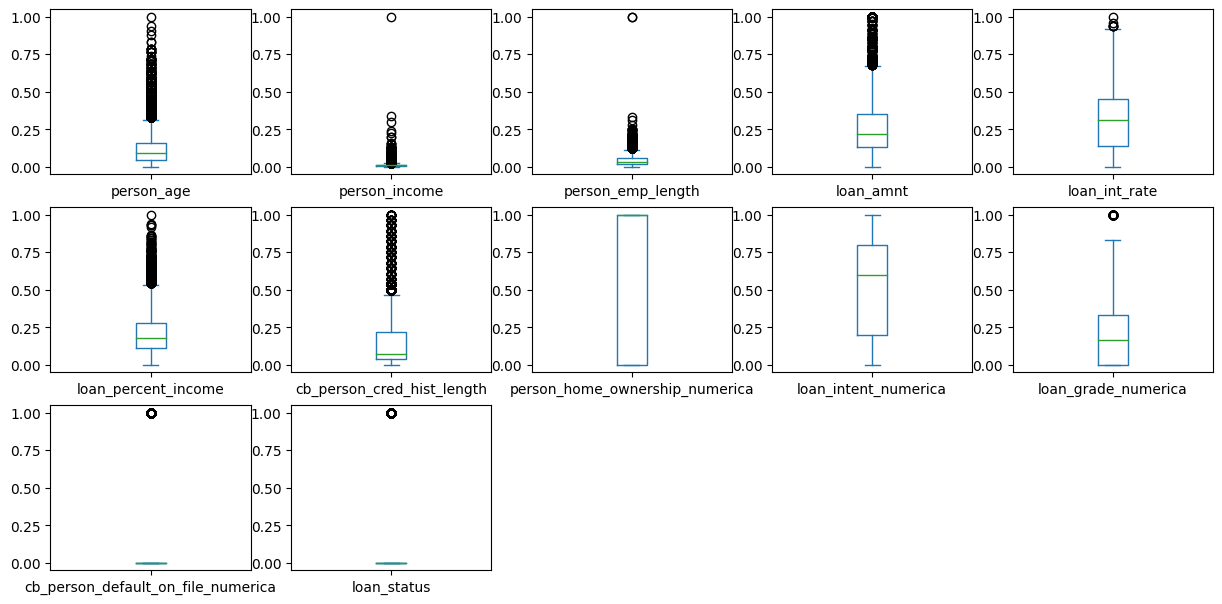

In [ ]:
fig=plt.figure(figsize=(15,15))
ax=fig.gca()
datos_consolidado.plot(ax=ax,kind='box',subplots=True,layout=(6,5),sharex=False)
plt.show()

Analisis multivariado
entre las variables independientes y la variable objetivo que en este caso es loan_status

In [ ]:
datos_corr=datos_consolidado.copy()
correlacion=datos_corr.corr(method='pearson')
correlacion

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_numerica,loan_intent_numerica,loan_grade_numerica,cb_person_default_on_file_numerica,loan_status
person_age,1.000000,0.116724,0.168831,0.055927,0.009506,-0.039265,0.877337,-0.035505,0.036861,0.012252,0.008520,-0.023306
person_income,0.116724,1.000000,0.136427,0.264942,-0.001346,-0.251487,0.116622,-0.201591,0.002469,0.001470,-0.002653,-0.140456
person_emp_length,0.168831,0.136427,1.000000,0.110934,-0.056607,-0.055033,0.146486,-0.232544,0.020593,-0.049578,-0.028179,-0.082852
loan_amnt,0.055927,0.264942,0.110934,1.000000,0.146026,0.577708,0.045334,-0.130304,-0.003424,0.150345,0.040714,0.114153
loan_int_rate,0.009506,-0.001346,-0.056607,0.146026,1.000000,0.123441,0.014562,0.136704,-0.002559,0.933528,0.500174,0.339995
loan_percent_income,-0.039265,-0.251487,-0.055033,0.577708,0.123441,1.000000,-0.029690,0.140541,0.000308,0.125770,0.036503,0.380000
cb_person_cred_hist_length,0.877337,0.116622,0.146486,0.045334,0.014562,-0.029690,1.000000,-0.025153,0.036259,0.013683,0.007988,-0.016559
person_home_ownership_numerica,-0.035505,-0.201591,-0.232544,-0.130304,0.136704,0.140541,-0.025153,1.000000,0.010356,0.116422,0.062408,0.208148
loan_intent_numerica,0.036861,0.002469,0.020593,-0.003424,-0.002559,0.000308,0.036259,0.010356,1.000000,-0.004449,-0.002493,-0.064754
loan_grade_numerica,0.012252,0.001470,-0.049578,0.150345,0.933528,0.125770,0.013683,0.116422,-0.004449,1.000000,0.535576,0.380193


In [ ]:
datos_corr['loan_status']=datos_corr['loan_status'].astype(int)

<function matplotlib.pyplot.show(close=None, block=None)>

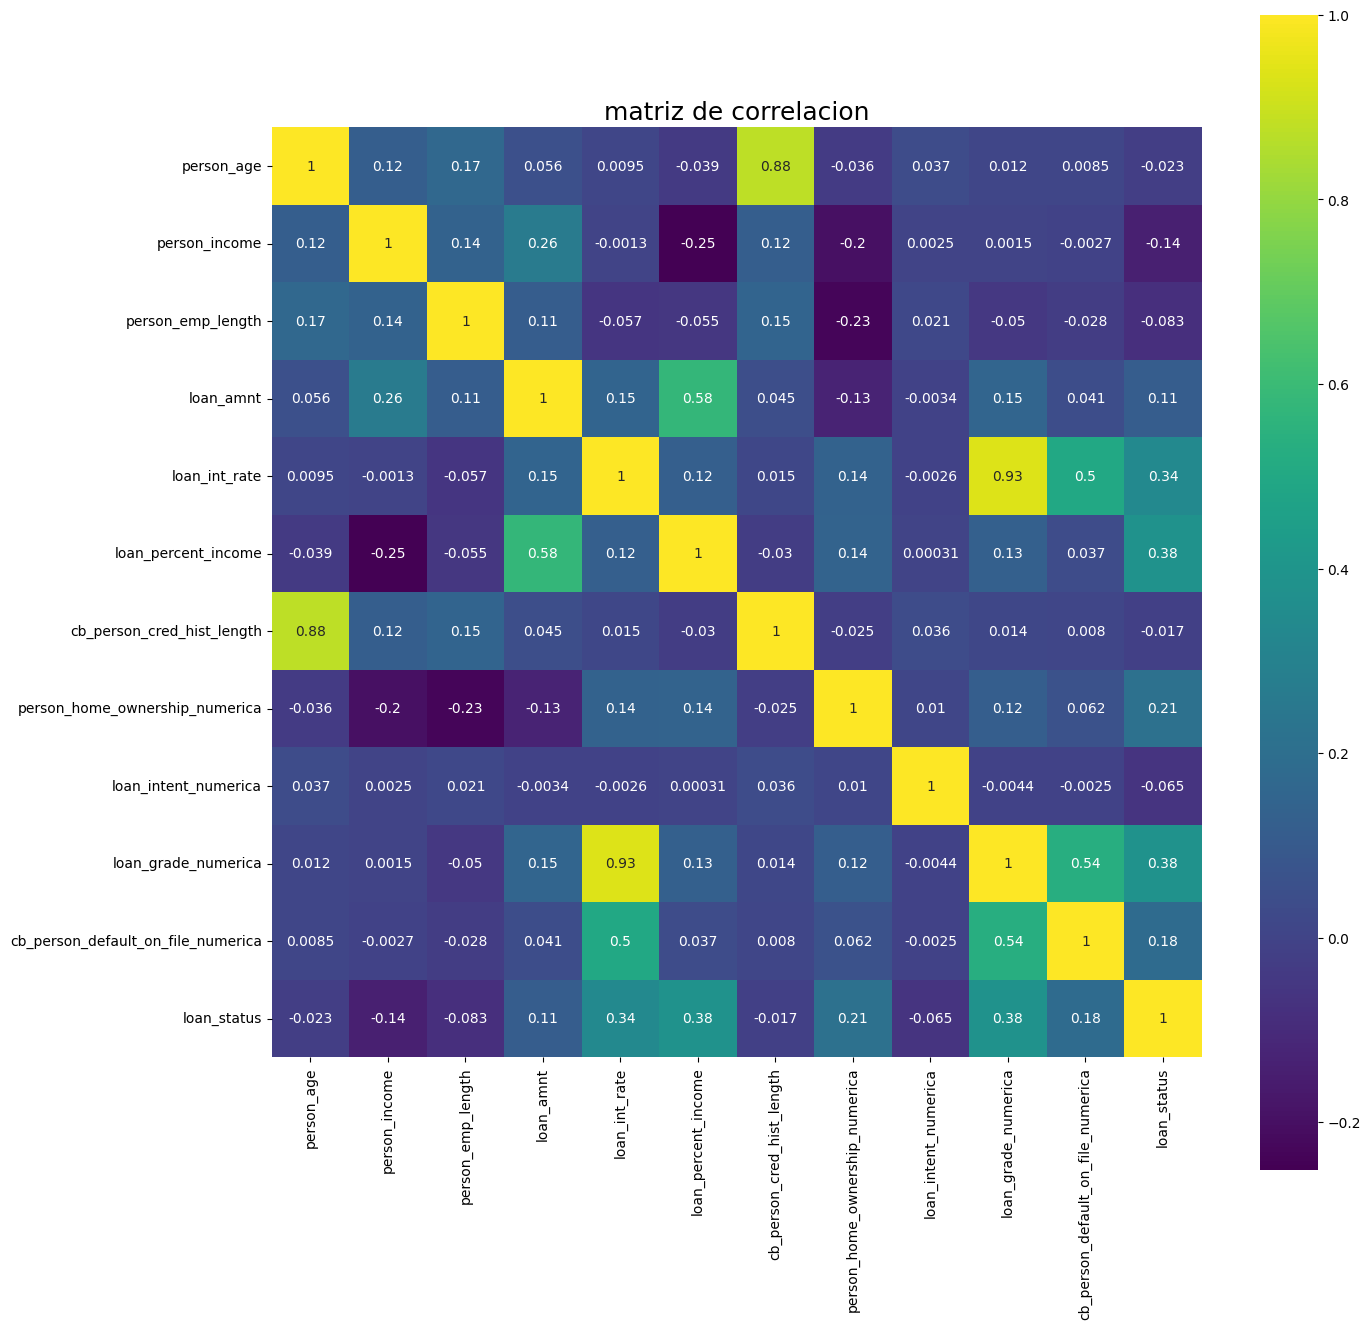

In [ ]:
correlation=datos_corr.corr()
plt.figure(figsize=(15,15))
ax=sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='viridis')
plt.title('matriz de correlacion',fontsize=18)
plt.show

Del grafico anterior la variable loan status, tiene una interaccion un poco alta con la variable loan grade. Para ver mejor que variables tienen mayor interaccion con la variable respuesta se hace lo siguiente.


In [ ]:
relevante_features=correlation[correlation>0.60]
relevante_features


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_numerica,loan_intent_numerica,loan_grade_numerica,cb_person_default_on_file_numerica,loan_status
person_age,1.000000,NaN,NaN,NaN,NaN,NaN,0.877337,NaN,NaN,NaN,NaN,NaN
person_income,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
person_emp_length,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_int_rate,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.933528,NaN,NaN
loan_percent_income,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
cb_person_cred_hist_length,0.877337,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
person_home_ownership_numerica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
loan_intent_numerica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
loan_grade_numerica,NaN,NaN,NaN,NaN,0.933528,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


La variable que mas relacion tiene con la variable respuesta es el grado del prestamo y el porcentaje de ingresos y la que menos relacion tiene es la longitud del historial crediticio del usuario.

In [ ]:
cor_target=abs(correlation['loan_status'])
cor_target

person_age                            0.023306
person_income                         0.140456
person_emp_length                     0.082852
loan_amnt                             0.114153
loan_int_rate                         0.339995
loan_percent_income                   0.380000
cb_person_cred_hist_length            0.016559
person_home_ownership_numerica        0.208148
loan_intent_numerica                  0.064754
loan_grade_numerica                   0.380193
cb_person_default_on_file_numerica    0.182397
loan_status                           1.000000
Name: loan_status, dtype: float64

**Seleccion de las mejores variables.**

In [ ]:
relevante_features=cor_target[cor_target>0.07]
relevante_features

person_income                         0.140456
person_emp_length                     0.082852
loan_amnt                             0.114153
loan_int_rate                         0.339995
loan_percent_income                   0.380000
person_home_ownership_numerica        0.208148
loan_grade_numerica                   0.380193
cb_person_default_on_file_numerica    0.182397
loan_status                           1.000000
Name: loan_status, dtype: float64

Se procede a usar todas las variables porque ninguna sobrepasa el 50%

**Modelo regresion logistica**
Se tiene como variable respuesta: loan_status
Variables independientes: person_age, person_income, person_emp_length, loan_amnt, loan_percent_income, person_home_ownership_numerica, loan_intent_numerica, loan_grade_numerica, cb_person_default_on_file_numerica

No se tiene en cuenta cb_person_cred_hist_length y loan_int_rate, porque son variables que estan muy correlacionadas y puede ser redundante tenerlas, ya que hay otras variables que explican con similitud.
Tampoco se tiene encuenta 'loan_amnt'

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_clas, Y_clas, test_size=0.2, random_state=0)

# Crea y ajusta el modelo de regresión logística
modelo = LogisticRegression()
modelo.fit(X_train, Y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Evalúa el rendimiento del modelo (por ejemplo, la precisión)
precision = modelo.score(X_test, Y_test)
print("Precisión del modelo:", precision)

Precisión del modelo: 0.8123136291878618


Comparacion con otros modelos

In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
models=[]
models.append(('LoR',LogisticRegression()))
models.append(('K-NN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))

In [ ]:
Results=[]
names=[]
scoring='accuracy'

In [ ]:
for name, model in models:
  kfold=KFold(n_splits=10)
  cv_results=cross_val_score(model,X_clas,Y_clas,cv=kfold,scoring=scoring)
  Results.append(cv_results)
  names.append(name)

  print(f'{name}:{cv_results.mean()*100.0:,.2f}%({cv_results.std()*100.0:,.2f}%)')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LoR:81.45%(2.62%)
K-NN:81.51%(3.42%)
NB:81.40%(2.85%)


**Scorecard**

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [ ]:
datos_app_web=pd.read_csv("/content/nueva_base_de_datos.csv",delimiter=',')
datos_app_web

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_numerica,loan_intent_numerica,loan_grade_numerica,cb_person_default_on_file_numerica
0,22.0,59000,123.0,35000,16.02,1,0.59,3,3,4,3,1
1,21.0,9600,5.0,1000,11.14,0,0.10,2,2,1,1,0
2,25.0,9600,1.0,5500,12.87,1,0.57,3,0,3,2,0
3,23.0,65500,4.0,35000,15.23,1,0.53,2,3,3,2,0
4,24.0,54400,8.0,35000,14.27,1,0.55,4,3,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
28496,57.0,53000,1.0,5800,13.16,0,0.11,30,0,4,2,0
28497,54.0,120000,4.0,17625,7.49,0,0.15,19,0,4,0,0
28498,65.0,76000,3.0,35000,10.99,1,0.46,28,3,2,1,0
28499,56.0,150000,5.0,15000,11.48,0,0.10,26,0,4,1,0


In [ ]:
ls = datos_app_web.columns[5]

# Utiliza pop() para eliminar la columna de la posición 5
columna_eliminada = datos_app_web.pop(ls)

# Calcula la última posición donde deseas insertar la columna
ultima_posicion = len(datos_app_web.columns)

# Inserta la columna eliminada en la última posición
datos_app_web.insert(ultima_posicion, ls, columna_eliminada)
datos_app_web

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_numerica,loan_intent_numerica,loan_grade_numerica,cb_person_default_on_file_numerica,loan_status
0,22.0,59000,123.0,35000,16.02,0.59,3,3,4,3,1,1
1,21.0,9600,5.0,1000,11.14,0.10,2,2,1,1,0,0
2,25.0,9600,1.0,5500,12.87,0.57,3,0,3,2,0,1
3,23.0,65500,4.0,35000,15.23,0.53,2,3,3,2,0,1
4,24.0,54400,8.0,35000,14.27,0.55,4,3,3,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
28496,57.0,53000,1.0,5800,13.16,0.11,30,0,4,2,0,0
28497,54.0,120000,4.0,17625,7.49,0.15,19,0,4,0,0,0
28498,65.0,76000,3.0,35000,10.99,0.46,28,3,2,1,0,1
28499,56.0,150000,5.0,15000,11.48,0.10,26,0,4,1,0,0


In [ ]:
datos_app_web.iloc[16]

person_age                                23.00
person_income                         120000.00
person_emp_length                          0.00
loan_amnt                              35000.00
loan_int_rate                              7.90
loan_percent_income                        0.29
cb_person_cred_hist_length                 4.00
person_home_ownership_numerica             3.00
loan_intent_numerica                       1.00
loan_grade_numerica                        0.00
cb_person_default_on_file_numerica         0.00
loan_status                                0.00
Name: 16, dtype: float64

In [ ]:
X_web = datos_app_web.drop('loan_status', axis=1)
Y_web = datos_app_web['loan_status']

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X_web, Y_web, test_size=0.2, random_state=0)

modelo = LogisticRegression()
modelo.fit(X_train, Y_train)

model_web = LogisticRegression()
model_web.fit(X_train, Y_train)

# función para obtener la probabilidad y el valor de "loan_status" automáticamente
def obtener_probabilidad_y_loan_status(fila_manual):
    # Crea un DataFrame con los datos de la fila manual
    new_datos = pd.DataFrame([fila_manual])

    # Utiliza el modelo para predecir la probabilidad de riesgo para la fila manual
    probabilidades = model_web.predict_proba(X1_test)
    probabilidad_riesgo = probabilidades[:, 1]

    # Busca el valor de "loan_status" correspondiente en el DataFrame original
    # basado en las otras características
    fila_correspondiente = datos_app_web[
        (datos_app_web['person_age'] == fila_manual['person_age']) &
        (datos_app_web['person_income'] == fila_manual['person_income']) &
        (datos_app_web['person_emp_length'] == fila_manual['person_emp_length']) &
        (datos_app_web['loan_amnt'] == fila_manual['loan_amnt']) &
        (datos_app_web['loan_int_rate'] == fila_manual['loan_int_rate']) &
        (datos_app_web['loan_percent_income'] == fila_manual['loan_percent_income']) &
        (datos_app_web['cb_person_cred_hist_length'] == fila_manual['cb_person_cred_hist_length']) &
        (datos_app_web['person_home_ownership_numerica'] == fila_manual['person_home_ownership_numerica']) &
        (datos_app_web['loan_intent_numerica'] == fila_manual['loan_intent_numerica']) &
        (datos_app_web['loan_grade_numerica'] == fila_manual['loan_grade_numerica'])
    ]

    # Obtiene el valor de "loan_status" correspondiente
    valor_loan_status = fila_correspondiente.iloc[0]['loan_status']

    return probabilidad_riesgo[0], valor_loan_status

# Ingresa manualmente los datos de la fila que deseas evaluar (sin incluir "loan_status")
fila_manual = {
    'person_age': 23.00,
    'person_income': 120000.00,
    'person_emp_length': 0.00,
    'loan_amnt': 35000.00,
    'loan_int_rate': 7.90,
    'loan_percent_income': 0.29,
    'cb_person_cred_hist_length': 4.00,
    'person_home_ownership_numerica': 3.00,
    'loan_intent_numerica': 1.00,
    'loan_grade_numerica': 0.00,
    'cb_person_default_on_file_numerica':0.00
}

probabilidad, loan_status = obtener_probabilidad_y_loan_status(fila_manual)


print("Probabilidad de incumplimiento:", probabilidad)
print("Estado del prestamo:", loan_status)

Probabilidad de incumplimiento: 0.4863979704488545
Estado del prestamo: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
precision = model_web.score(X_test, Y_test)
print("Precisión del modelo:", precision)

Precisión del modelo: 0.8123136291878618
